# Scientific Computing Session 6
## Ruize Li
## CRSid: rl737
## Jesus College


In [1]:
# Importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from numpy.random import rand, randn   # to generate random matrices
from numpy.linalg import inv # Matrix inversion routine from the linear algbra package in NumPy
from numpy.linalg import eig # linear algebra eigen-solver
from numpy.linalg import det # determinant of a matrix

np.set_printoptions(suppress=True) # to make tiny values appear as zero
np.set_printoptions(precision=4)   # number of digits in floats (or longfloats)
#np.set_printoptions(formatter={'float_kind':"{:.2f}"})
#np.set_printoptions()

# Set font for labels in coming figures
font16 = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }

# Set font for labels in coming figures
font20 = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 20,
          }

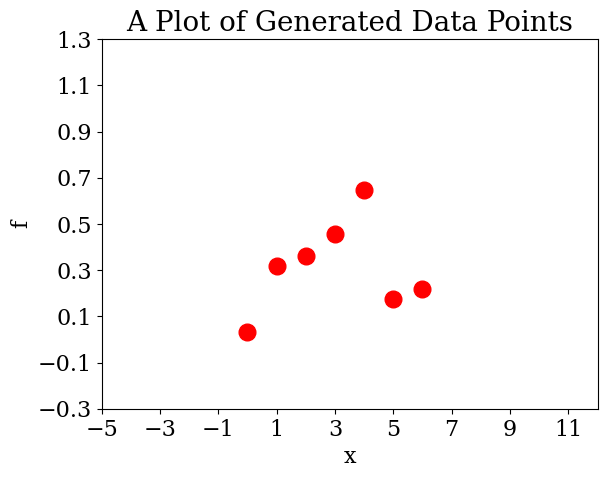

In [2]:
# Generate seven data points from x=0 to x=6
x = np.array([0,1,2,3,4,5,6])

# Generate f(x) according to a flat distribution
f = np.array(rand(7,1))

# Plot the data points generated
plt.title('A Plot of Generated Data Points',fontdict=font20)
plt.xlim(-5,12)
plt.ylim(-0.3,1.3)
plt.xticks(np.arange(-5, 13, step=2),fontsize=16,fontfamily='serif')
plt.yticks(np.arange(-0.3, 1.5, step=0.2),fontsize=16,fontfamily='serif')
plt.plot(x,f,'ro',markersize=12)
plt.xlabel('x',fontdict=font16)
plt.ylabel('f',fontdict=font16)
plt.show()

<ipython-input-3-33af1a24d1ab>:39: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.3,1,3)


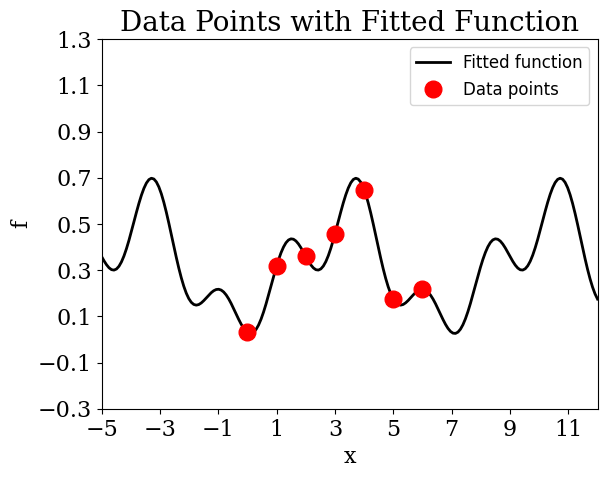

In [3]:
# Generate g(x), initialise it to ones
G = np.ones((7,7))  # Initialise to ones (since first column will be ones anyway)

a = 7.
k = 2.*pi/a

# Generate G column by column.
auxi = np.sin(k*x)    # The x array is horizontal
G[0:7,1] = np.transpose( auxi )  # Transpose the former to get it as column
auxi = np.cos(k*x)
G[0:7,2] = np.transpose( auxi )
auxi = np.sin(2.*k*x)
G[0:7,3] = np.transpose( auxi )
auxi = np.cos(2.*k*x)
G[0:7,4] = np.transpose( auxi )
auxi = np.sin(3.*k*x)
G[0:7,5] = np.transpose( auxi )
auxi = np.cos(3.*k*x)
G[0:7,6] = np.transpose( auxi )

# Inverting G to get g
g = inv(G)

# g was checked, Gg does give a diagonal unit matrix.
#print(np.matmul(G,g))

# Obtain the needed coefficients a
a = np.matmul(g,(f))  # Take the transpose to make a a 7x1 matrix

# Generate a set of 200 x points along the x axis
xp = np.linspace(-5,12,200)

# Generate the fitted function
ff = a[0] + a[1]*np.sin(k*xp) + a[2]*np.cos(k*xp) + a[3]*np.sin(2.*k*xp) + a[4]*np.cos(2.*k*xp) + a[5]*np.sin(3.*k*xp) + a[6]*np.cos(3.*k*xp)

# Plot ff with respect to xp
plt.title('Data Points with Fitted Function',fontdict=font20)
plt.xlim(-5,12)
plt.ylim(-0.3,1,3)
plt.xlabel('x',fontdict=font16)
plt.ylabel('f', fontdict=font16)
plt.xticks(np.arange(-5, 12, step=2),fontsize=16,fontfamily='serif')
plt.yticks(np.arange(-0.3, 1.4, step=0.2),fontsize=16,fontfamily='serif')
plt.plot(xp,ff,color='black',linewidth=2.0,label='Fitted function')
plt.plot(x,f,'ro',markersize=12,label='Data points')
plt.legend(fontsize=12)
plt.show()